# DataCamp: Statistical Thinking + Sampling (part of Simulation)

Detail Materials
- Part1 - https://github.com/wblakecannon/DataCamp/tree/master/04-statistical-thinking-in-python-(part1)
- Part2 - https://github.com/wblakecannon/DataCamp/tree/master/07-statistical-thinking-in-python-(part-2)

STATS_THINKING: 

- Graphical exploratory data analysis (EDA), Quantative EDA
- Construct (beautiful) instructive plots, including histogram, swarmplot, Empirical Cumulative Distribution Functions (ECDF), Box Plots, Scatter Plots
- Compute informative summary statistics, Covariance, Pearson correlation coefficient
- Code with hacker statistics using np.random
- Bernoulli trials, Binomial distribution, Poisson distribution
- Think probabilistically — discrete variables, continuous variables
- Probability mass function, probability density function, cumulative distribution function (CDF)
- Normal distribution, Normal CDF
- Exponential distribution
- Estimate parameter values
- Perform linear regressions
- Compute confidence intervals
- Perform hypothesis tests including A/B testing

SAMPLING:

- TBC

## EDA 
1. process of organising, plotting, summarising 
2. EDA is the foundation stone of further analysis

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'retina'

In [5]:
# Download datasets
!git clone https://github.com/aysbt/DataCamp.git /tmp/datacamp

Cloning into '/tmp/datacamp'...
remote: Enumerating objects: 427, done.
remote: Total 427 (delta 0), reused 0 (delta 0), pack-reused 427
Receiving objects: 100% (427/427), 25.64 MiB | 175.00 KiB/s, done.
Resolving deltas: 100% (200/200), done.


In [2]:
data_dir = '/tmp/datacamp/data'
!ls $data_dir

2008_swing_states.csv             female_literacy_fertility.csv
FY18_4050_FMRs.csv                flights_small.csv
L-L1_LOSC_4_V1-1126259446-32.hdf5 gandhi_et_al_bouts.csv
NLP                               gift_address_letter.csv
airports.csv                      gifts.csv
anscombe.csv                      grail.txt
auto-mpg.csv                      insurance_premiums.csv
basetable.csv                     ja_data2.mat
basetable_ex2_4.csv               michelson_speed_of_light.csv
battledeath.xlsx                  mnist_kaggle_some_rows.csv
belmont.csv                       planes.csv
bike_share.csv                    sales.sas7bdat
college_datav3.csv                seaslug.txt
cta_daily_station_totals.csv      sheffield_weather_station.csv
daily_show_guests_cleaned.csv     stocks.csv
data.csv                          titanic_pickle.pkl
data2.csv                         titanic_sub.csv
disarea.dta


In [16]:
!head $data_dir/200

head: Error reading /tmp/datacamp/data


In [7]:
import pandas as pd

df_swing = pd.read_csv(data_dir + '/2008_swing_states.csv')
df_swing.head()

df_all_states = pd.read_csv("https://raw.githubusercontent.com/wblakecannon/DataCamp/master/04-statistical-thinking-in-python-(part1)/_datasets/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


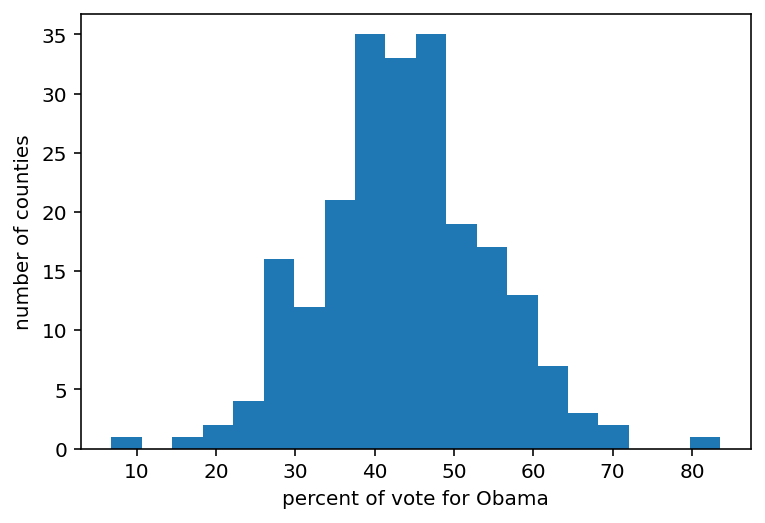

In [9]:
import matplotlib.pyplot as plt

_ = plt.hist(df_swing['dem_share'], bins=20)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

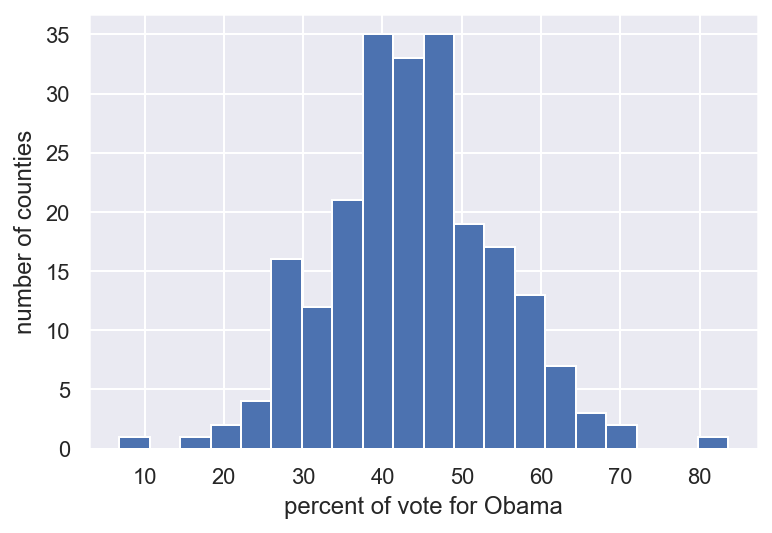

In [11]:
# Seaborn - an excellent Matplotlib-wrapper data visualisation 
# package written by Michael Waskom

import seaborn as sns

sns.set()
_ = plt.hist(df_swing['dem_share'], bins=20)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

### Bins can be bias, BEE SWARM PLOT

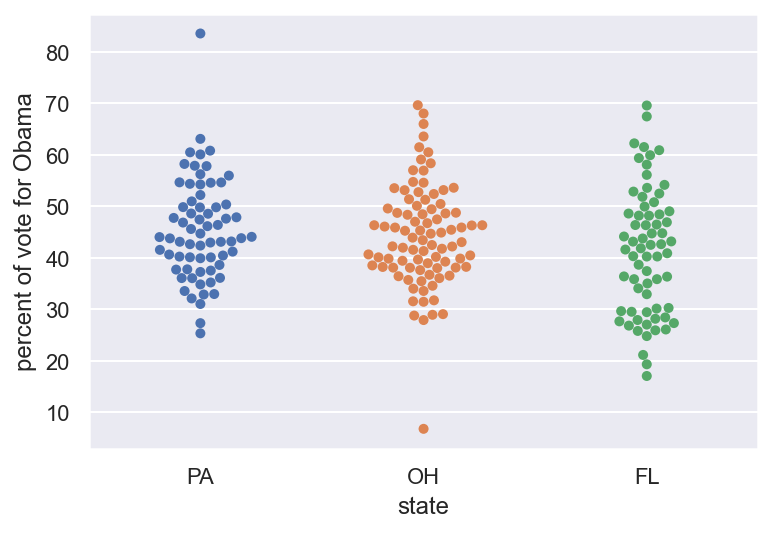

In [13]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Empirical Cumulative Distribution Functions ECDF

1. CDF of sample or observed datapoints
2. Clarity in viewing percentiles 

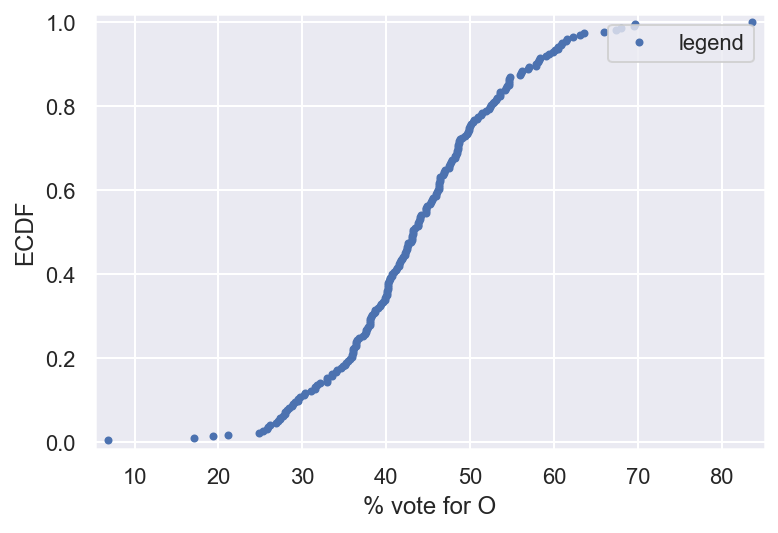

In [14]:
import numpy as np

x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('% vote for O')
_ = plt.ylabel('ECDF')
plt.legend(('legend', 'another', 'last one'), loc='upper right')
plt.margins(0.02) # keeps data off plot edges
plt.show()

In [15]:
# create func of ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Median is '50th Percentile' (e.g. 43.185% in above ECDF)

In [16]:
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

### IQR - 1.5 IQR beyond generally considered outliers

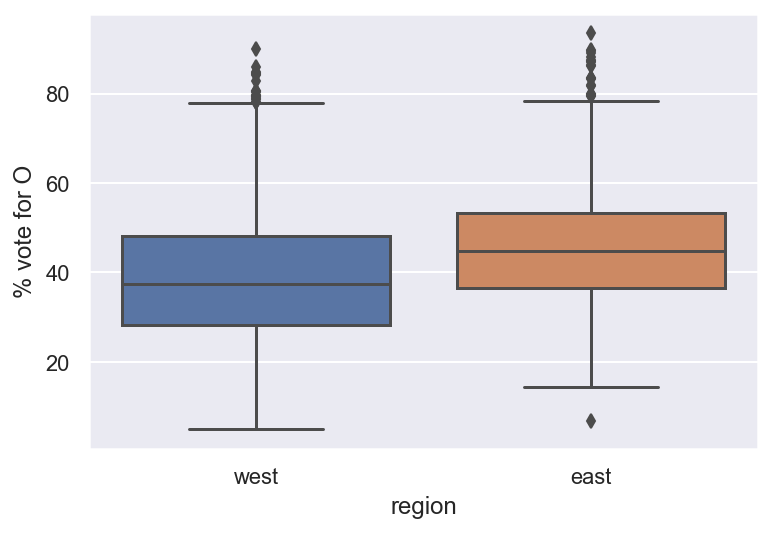

In [18]:
_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('% vote for O')
plt.show()

### Pearson Correlation Coefficient = cov(x,y) / sd(x)sd(y) = variability due to codependence / independent variability

In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

## HACKER Statistics - using simulated repeated measurements to compute probabilities

1. determine how to simulate data
2. simulate many times
3. probability = fraction of trials with outcome

### Example: 10000 simulations of 4-trial coin flipping

In [20]:
n_all_heads = 0

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
n_all_heads / 10000

0.0615

In [21]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

> Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

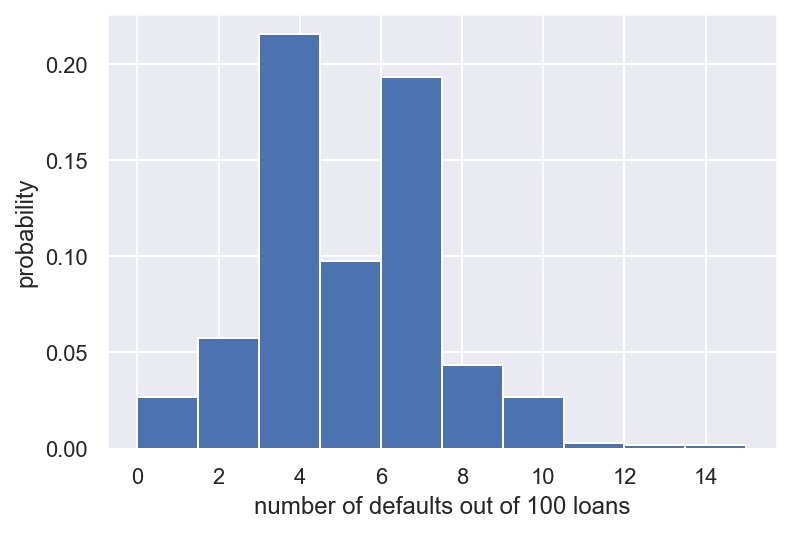

In [24]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

### Binomial Distribution - number r of successes in n Bernoulli trials with proba p of success

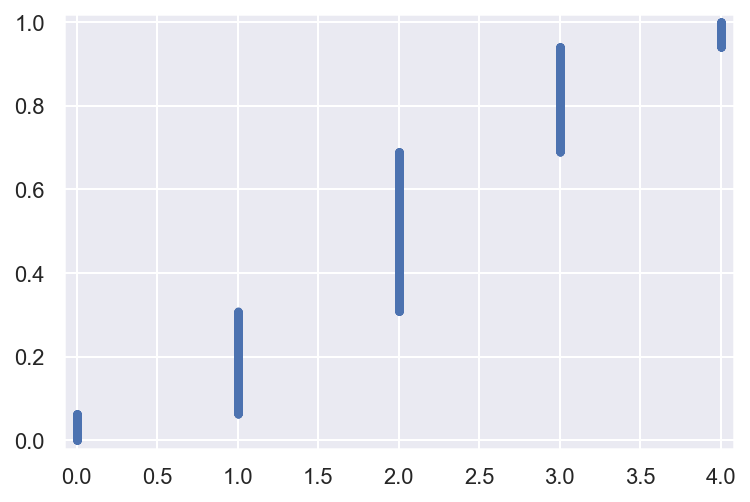

In [25]:
sample = np.random.binomial(4, 0.5, size=10000)
x,y = ecdf(sample)

_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.show()

### Poisson Distribution - number r of arrivals of a Poisson process in a given time interval with average rate of lamda arrivals per interval 

#### Limit of the Binomial for low proba of success and large n = Poisson Distribution (i.e. rare events)

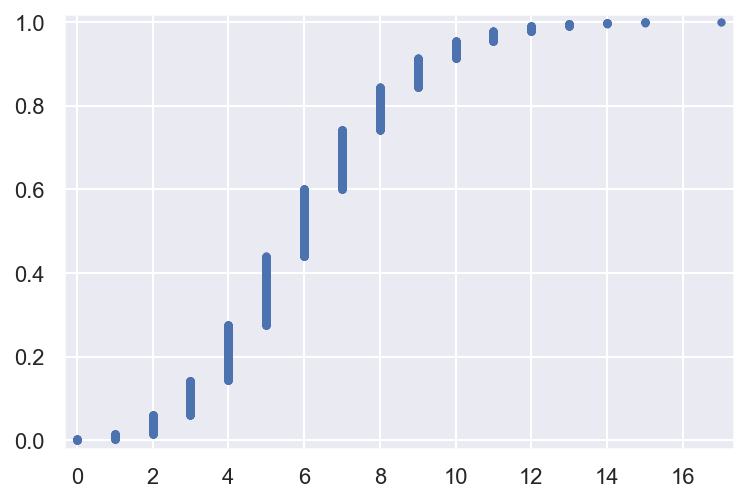

In [26]:
sample1 = np.random.poisson(6, size=10000)
x,y = ecdf(sample1)

_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.show()

In [27]:
michelson_speed_of_light = pd.read_csv(data_dir + "/michelson_speed_of_light.csv")

In [28]:
michelson_speed_of_light.columns

Index(['Unnamed: 0', 'date', 'distinctness of image', 'temperature (F)',
       'position of deflected image', 'position of slit',
       'displacement of image in divisions',
       'difference between greatest and least', 'B', 'Cor',
       'revolutions per second', 'radius (ft)', 'value of one turn of screw',
       'velocity of light in air (km/s)', 'remarks'],
      dtype='object')

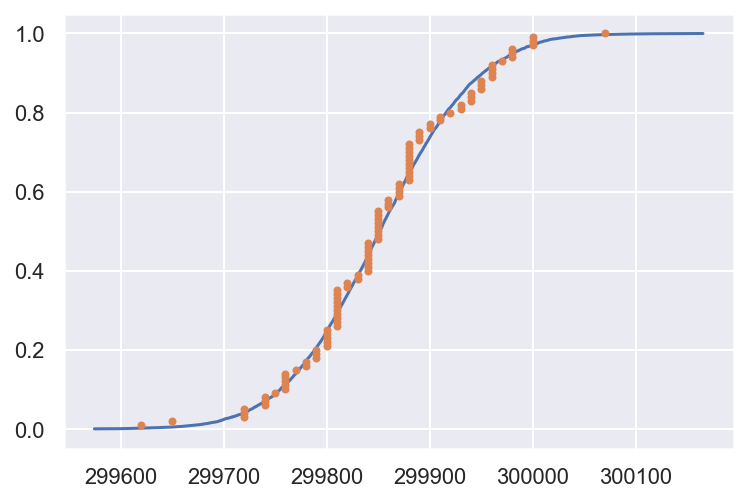

In [30]:
# ECDF of dataset
speed_col = michelson_speed_of_light['velocity of light in air (km/s)']
mean = np.mean(speed_col)
std = np.std(speed_col)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(speed_col)
x_pop, y_pop = ecdf(samples)
_ = plt.plot(x_pop, y_pop)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.show()

#### If you can simulate the story/process, you can get its 'distribution' and thereby statistics

##### Poisson models a 'rare' event, and its 'waiting time' between is Exponential Distribution

##### e.g. What is the waiting for TWO poisson events ??

In [31]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

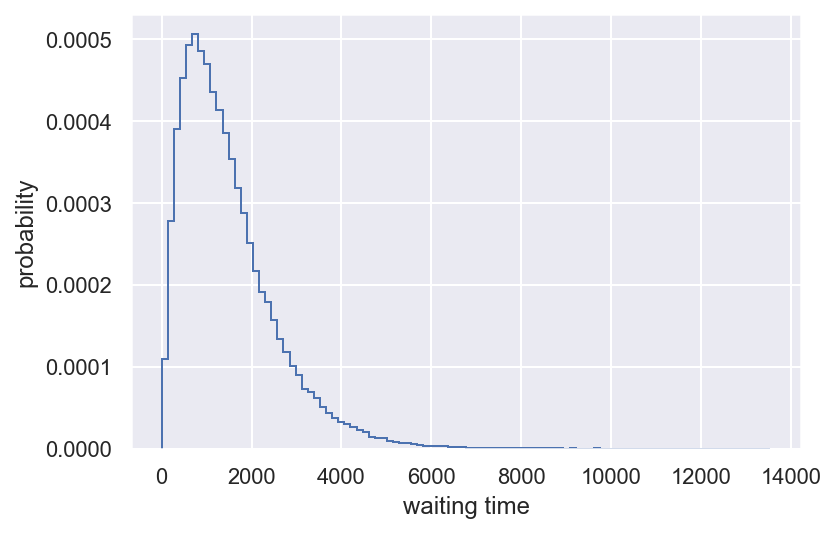

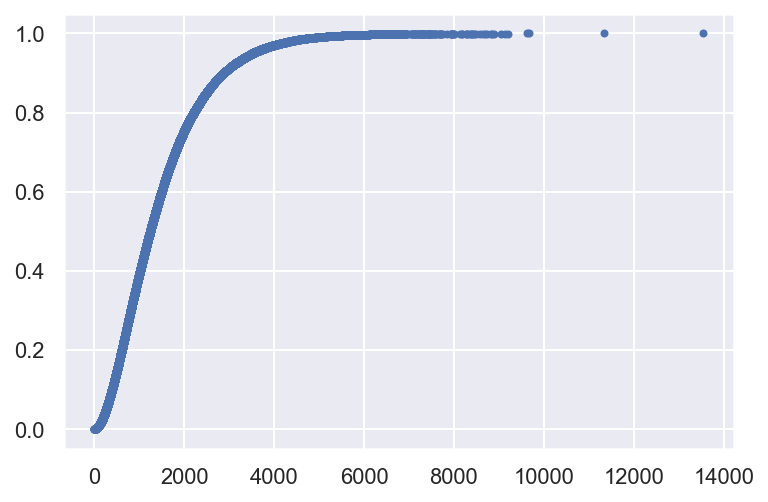

In [34]:
# Draw samples of waiting times: waiting_times (i.e. # games)

waiting_times = successive_poisson(764,715,size=100000)

# Make the histogram
_ = plt.hist(waiting_times, density=True, histtype='step', bins=100)
# Label axes
_ = plt.xlabel("waiting time")
_ = plt.ylabel("probability")
plt.show()

# ECDF
x, y = ecdf(waiting_times)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.show()

### Optimal parameters

- Checking normality of Michelson data by repeated sampling without replacement, with in-sample statistics - parameter values bringing the model in closest agreement with the data based on direct statistics called Optimal parameters (model is key)
- Finding optimal parameters not mere calculating mean and etc.

> Hacker statistics, instead of scipy.stats, used for its versatility

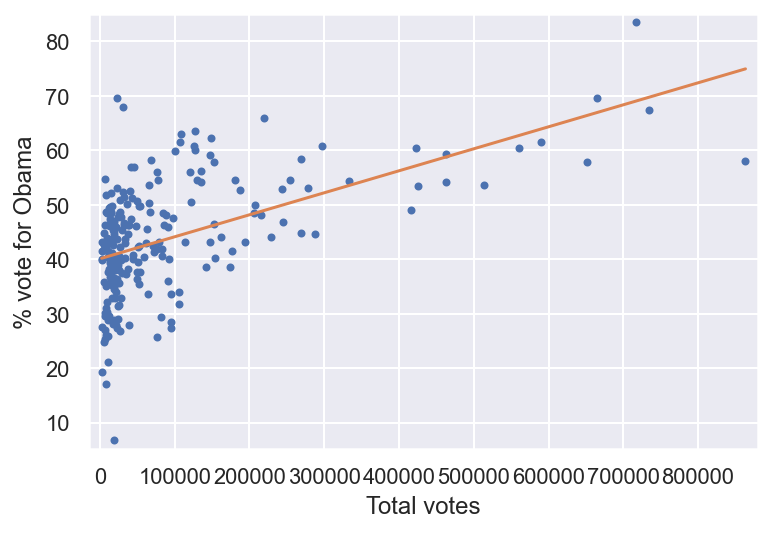

In [35]:
# linear regression via OLS

slope, intercept = np.polyfit(df_swing.total_votes, df_swing.dem_share, 1)

# Plot the illiteracy rate versus fertility
_ = plt.plot(df_swing.total_votes, df_swing.dem_share, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Total votes')
_ = plt.ylabel('% vote for Obama')

# Make theoretical line to plot
x = np.array([df_swing.total_votes.min(), df_swing.total_votes.max()])
y = slope * x + intercept

_ = plt.plot(x, y)
plt.show()

> Anscombe's Quartet: beware of actual dataset before OLS

> Always Visual-ECDF before analysis

## BOOTSTRAP - use of resampled data to perform statistical inference

1. each sampling is sample array of simulation - **bootstrap sample**
2. each array gets **bootstrap replicate** - stats computed from resampled array

In [36]:
np.random.choice([1,2,3,4,5], size=5)

array([2, 5, 1, 5, 5])

#### visual feel for how BS sampling allows probabilistic depiction of data

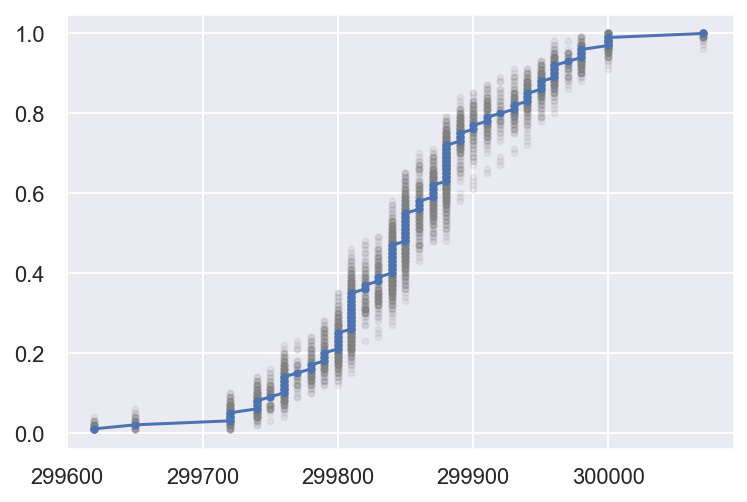

In [38]:
for _ in range(50):
    bs_sample = np.random.choice(speed_col, size=len(speed_col))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

x, y = ecdf(speed_col)
_ = plt.plot(x, y, marker='.')

plt.show()

### Def a func of Bootstrap sampling returning stats of interest 

- using len() to get the same number of rows/obser/entries as original data
- call func to get BS-replicates or stats of interests

> HOW to simulate? looping 'for i in range(100000)'

### p% CI : if we repeated measurements, p% of the observed values would lie within the p% CI
> e.g. if repeated, 95% of the means of 'speed of light' would lie within the 95% CI, as it asymptotically towards NORMAL
- the 95% CI is simply 2.5 and 97.5 percentile of the replicates distribution from BS

In [39]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

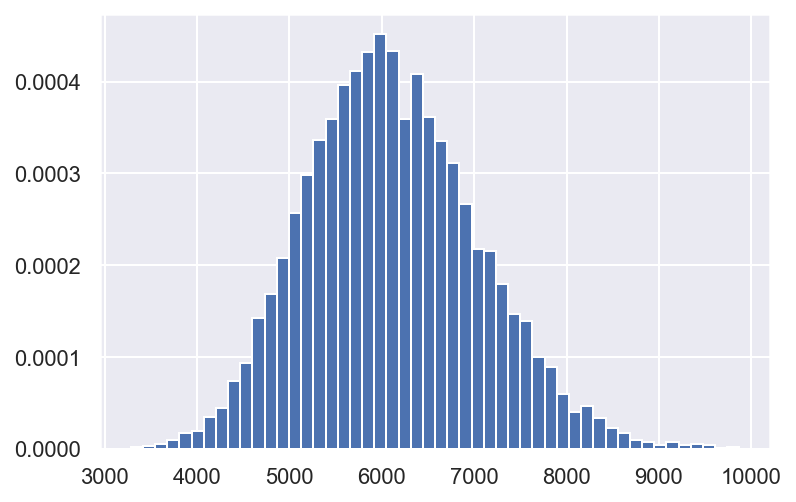

In [41]:
# generate 10000 BS replicates of the variance 
bs_replicates = draw_bs_reps(speed_col, np.var, 10000)

_ = plt.hist(bs_replicates, density=True, bins=50)
plt.show()

> **This is not Normal, as it has lnger tail to the right. Note that you can also compute a CI on the variance, or any other stats, using np.percentile() with BS replicates**

In [42]:
np.percentile(bs_replicates, [2.5, 97.5])

array([4442.73025, 8079.063  ])

### PAIR BOOTSTRAP : the previous was NON-Parametric, Bootstrapped stats - unassuming any model

>  OLS is however a parametric estimates (slope and intercept) - BS on this also possible

- How would the election slope and intercept be if the election 'happened' again and again??

### PAIR BOOTSTRAP for OLS - randomly selection the vote as pairs, x-y pairs, compute stats (slope and intercept) from resample data, etc

- resample pairs (% Obama, total vote) (via Indexing)
- compute stats (slope, intercept)
- store as BS replicates per resampling
- compute CI from all replicates via percentile

In [43]:
np.arange(7)

inds = np.arange(len(df_swing.total_votes)) # get index object from observed data

bs_inds = np.random.choice(inds, len(inds))

bs_total_votes = df_swing.total_votes[bs_inds]

bs_dem_share = df_swing.dem_share[bs_inds]

array([0, 1, 2, 3, 4, 5, 6])

CPU times: user 751 ms, sys: 7.06 ms, total: 758 ms
Wall time: 756 ms
[3.27528040e-05 4.87621287e-05]


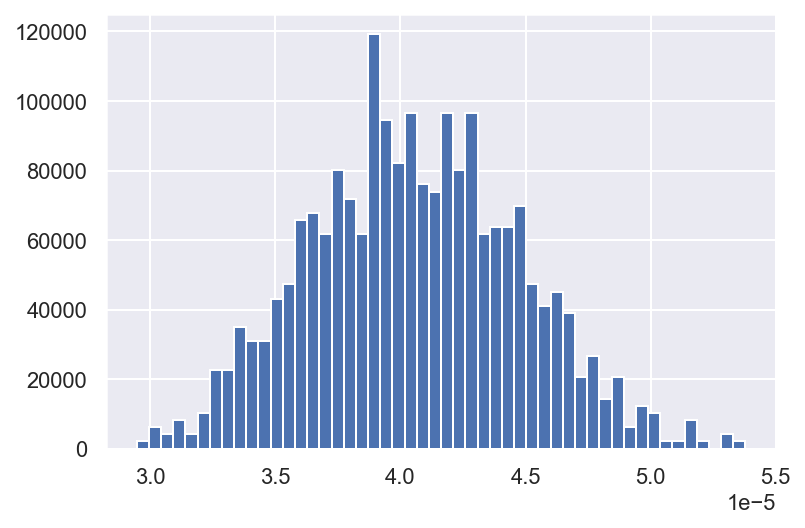

In [45]:
def draw_bs_pairs_linreg(x, y, size=1):
    """perform pair-bootstrap for linear regression"""
    
    inds  = np.arange(len(x))
    
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
        
    return bs_slope_reps, bs_intercept_reps

# apply func on voting data

%time bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df_swing.total_votes, df_swing.dem_share, size=1000)
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

_ = plt.hist(bs_slope_reps, bins=50, density=True)
plt.show()

[3.08485220e-05 4.87621287e-05] 
 [38.283274   41.56154515]


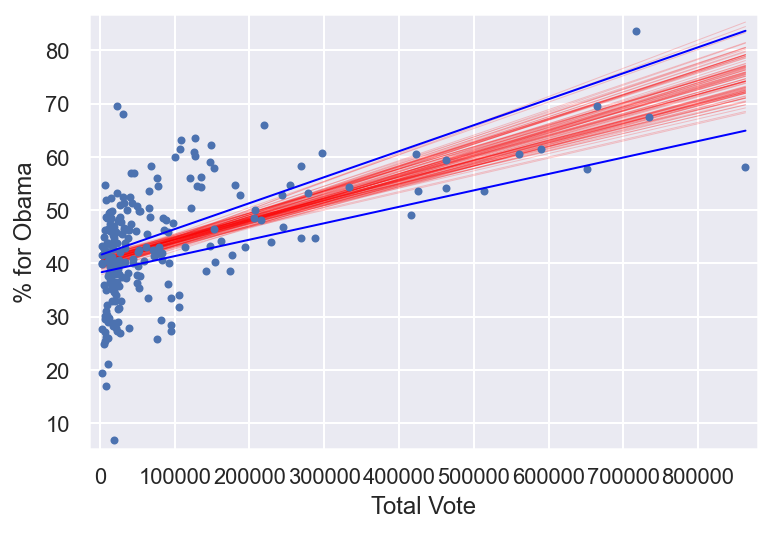

In [46]:
#  plotting bootstrap regression

x = np.array([df_swing.total_votes.min(), df_swing.total_votes.max()])

for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], 
                linewidth=0.5, alpha=0.2, color='red')

_ = plt.plot(df_swing.total_votes, df_swing.dem_share, marker='.', linestyle='none')

#  add CI(95%) lines
ci_slope_vote = np.percentile(bs_slope_reps, [0.5, 97.5])
ci_intercept_vote = np.percentile(bs_intercept_reps, [0.5, 97.5])
print(ci_slope_vote, '\n', ci_intercept_vote)

for i in range(2):
    _ = plt.plot(x, ci_slope_vote[i]*x + ci_intercept_vote[i], 
                linewidth=1, color='blue')

_ = plt.xlabel('Total Vote')
_ = plt.ylabel('% for Obama')
plt.margins(0.02)
plt.show()

## HYPOTHESIS - how to be sure?

### technically - how reasonable is the observation ASSUMING H0 (null hypothesis) !!
> In voting case, H0: two county voting (Obama) are the same or no difference; 

1. Combine the two observation (voting data combined)
2. PERMUTATION - ignore label, scrambling two labels as if H0 **the core of simulating H0 of no difference entre deux parties**
3. **permutation sample** obtained

In [47]:
df_swing.head(10)
dem_share_PA = df_swing.dem_share[df_swing.state == 'PA']
dem_share_OH = df_swing.dem_share[df_swing.state == 'OH']

dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))

dem_share_perm = np.random.permutation(dem_share_both)

perm_sample_PA = dem_share_perm[ : len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA) : ]

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04
5,PA,Wayne County,22835,9892,12702,43.78
6,PA,Susquehanna County,19286,8381,10633,44.08
7,PA,Warren County,18517,8537,9685,46.85
8,OH,Ashtabula County,44874,25027,18949,56.94
9,OH,Lake County,121335,60155,59142,50.46


In [48]:
# build a function of permutation sampling

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


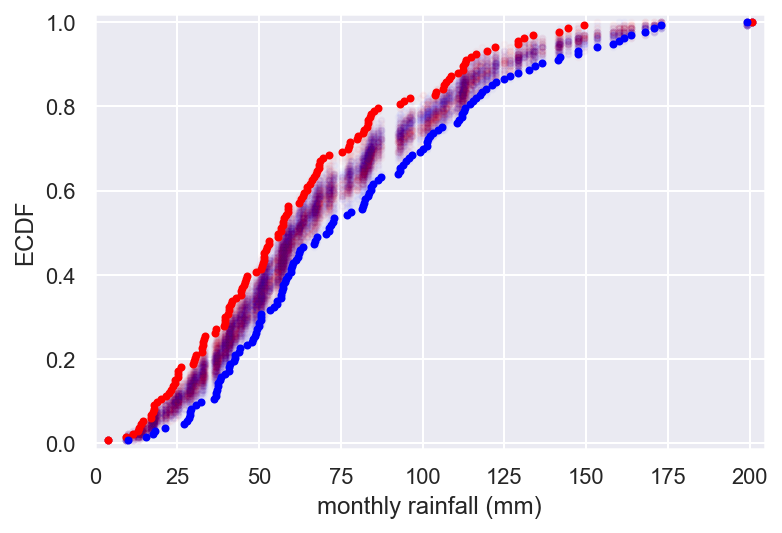

In [50]:
# visualising perm_samples

df_sheffield_weather = pd.read_csv(data_dir + '/sheffield_weather_station.csv', sep='\s+', comment='#')

df_sheffield_weather.head()

rain_july = df_sheffield_weather.rain[df_sheffield_weather.mm == 7]
rain_november = df_sheffield_weather.rain[df_sheffield_weather.mm == 11]

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

> **Notice above how perm_sample falls within/away observed july and november rain fall, implying H0: no diff or same distribution entre mois not commensurate with observed data**

### HYPOTHESIS TEST and P-VALUE

#### TEST is assessment of how reasonable the observation are | H0 is TRUE
#### This is bit vague, the questions on how/exact hinges on Test-Statistics

> **A Single number computed from observation and from simulation under H0**

> **Serving as basis for comparison between WHAT THE H0 PREDICT and OBSERVATION**

#### Test Statistics should be relevant to the question sought, e.g. 'are the two state different in voting'; if identical, they should have the same MEAN vote share for Obama = DIFF(vote share) == 0; 
1. Define TEST_STAT as **mean difference**
2. Permutation sampling and get **replicates, i.e. simulated mean differences**
3. Plot replicates, i.e. bell-shape and somewhat between -4 and 4 %
4. The actual/observation = 1.16%
5. The area (CDF) of histogram to the RIGHT of 1.16% = 23% of data (probability) had >= 1.16% the ACTUAL
6. This value is P VALUE - 23% - **probability of getting test-stats AT LEAST AS EXTREME as Observation under H0 true**

#### BEWARE of meaning of P-VALUE: 'exactly stated above' NOT proba(H0 = True), and depends of well-defined H0 and test-stats used
#### often named 'Null Hypothesis Significance Test' - statistically insignificant difference

#### BEWARE: low p-value (statistical insignificance) NOT EQUAL practical insigificance

In [51]:
# generating permutation replicates with self-defined function or test-statistics option

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [56]:
# PERMUTATION test whether differences observed (in mean) is due to chance
# H0: IDENTICAL DISTRIBUTION (NOT the same mean, which is less restrictive) and computing resulting Test Stat as Mean Differences as replicates
# Probability of Replicates >= (AT LEAST AS LARGE) 

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


df_frog = pd.read_csv("https://raw.githubusercontent.com/wblakecannon/DataCamp/master/07-statistical-thinking-in-python-(part-2)/_datasets/frog_tongue.csv",
                      skiprows=14)

force_I = df_frog['impact force (mN)'][df_frog.ID == 'I']
force_II = df_frog['impact force (mN)'][df_frog.ID == 'II']

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_I, force_II)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_I, force_II,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', f'{p:.20f}')

p-value = 0.00000000000000000000


> **Be aware not to equate low p-value (stat insig) as simply yes or no; significant practical difference between p-value 0.0001 and 0.000000001 !!!**

## Pipeline of NHST

1. Clearly define H0
2. Define test statistic
3. simulation under H0
4. compute test statistic from simulation dataset
5. obtain p-value

## Case: Michelson speed of light, two persons with two different mean (299,852 and 299,860); are they fundamentally different ? 

### Problem: full data set of Michelson, but ONLY the mean from Newcomb

1. H0: true mean speed from Michelson is Newcomb (true mean = the mean from lots of experiments)
2. To get H0, shifting Michelson dataset as if H0, that mean = Newcomb 299,860 km/s

Text(299630, 0.6, 'Original data')

Text(299900, 0.2, 'Shift data')

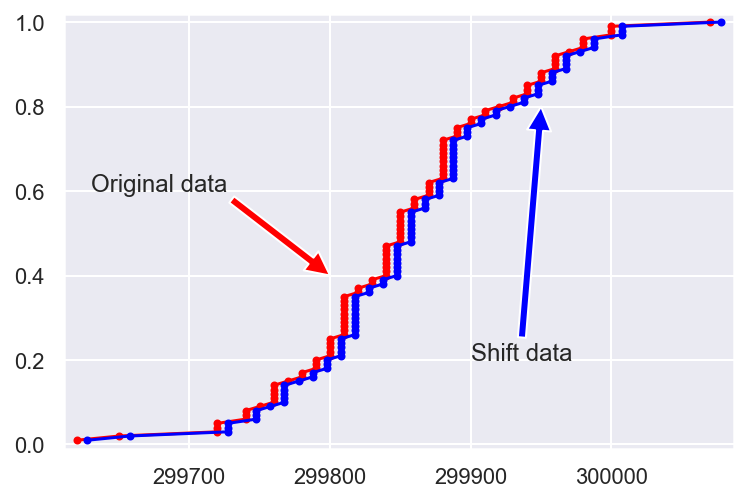

In [57]:
newcomb_speed = 299860
michelson_speed_shift = speed_col \
    - np.mean(speed_col) + newcomb_speed

x_base, y_base = ecdf(speed_col)
x_shift, y_shift = ecdf(michelson_speed_shift)
_ = plt.plot(x_base, y_base, marker='.', color='red')
_ = plt.plot(x_shift, y_shift, marker='.', color='blue')


plt.annotate('Original data', xy=(299800, 0.4), xytext=(299630, 0.6), arrowprops=dict(facecolor='red'))
plt.annotate('Shift data', xy=(299950, 0.8), xytext=(299900, 0.2), arrowprops=dict(facecolor='blue'))


plt.margins(0.02)
plt.show()

In [58]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data) - newcomb_value
diff_obs = diff_from_newcomb(speed_col)
diff_obs

-7.599999999976717

Text(-30, 400, 'p-value or probability')

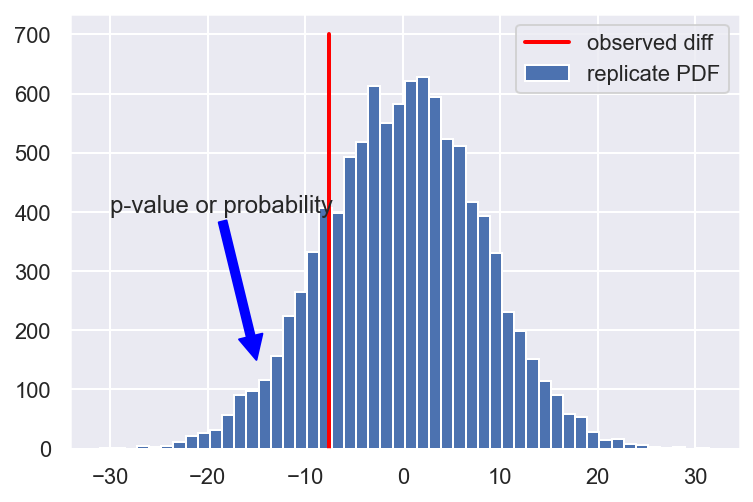

0.1721

In [59]:
bs_replicates = draw_bs_reps(michelson_speed_shift, diff_from_newcomb, 10000)

_ = plt.hist(bs_replicates, bins=50, label='replicate PDF')
_ = plt.plot([diff_obs, diff_obs], [0, 700], linewidth=2, color='red', label='observed diff')
plt.legend(loc='best')
plt.annotate('p-value or probability', xy=(-15, 150), xytext=(-30, 400), arrowprops=dict(color='blue'))
plt.show() 

p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value

### P-value calculation depends on meaning of replicates test stats being AT LEAST AS EXTREME as OBSERVATION
#### This speed of light case, the OBSERVATION is -7.6, TO THE LEFT of the 0 or bell centre, hence p-value is replicates <= that

### This is One-Sample test : comparing one dataset to a single number
> 
- ### this is useful when one compared full dataset is missing but one point, often a mean; **which means PERMUTATION is not possible** hence **cannot assess the H0: two Forces came from the SAME DIST**
- ### Therefore, test with a LESS RESTRICTIVE H0: IDENTICAL MEANS !!! 
- ### NOTE that p-value is LESS AND EQUAL to differences observed, (Previous Permutation is GREATER AND EQUAL)

### Following Two-Sample test: comparing between datasets
- Bootstrap method + Permutation resampling to test IDENTICAL DISTRIBUTION
- Concatenate two samples,
- Random draw permutated sampling and compute test statistics
- Replicates = mean difference
- p-value is replicates <= observation

In [60]:
empirical_diff_mean = diff_of_means(dem_share_OH, dem_share_PA)

forces_concat = np.concatenate((dem_share_OH, dem_share_PA))

bs_replicates = draw_perm_reps(dem_share_OH, dem_share_PA, diff_of_means, size=10000)
    
p = np.sum(bs_replicates >= empirical_diff_mean) / len(bs_replicates)
print('p value is', f'{p:.15f}')

p value is 0.761700000000000


### One-simple and two-sample bootsrap is testing the same thing, hence similar p value. BUT Permutation test EXACTLY simulates the H0 of identical distribution, where as boostrap test approximately simulates it. (below shows bootstrap is more versatile)

### Specifically, permutation cannot test identical mean; two-sample bootstrap is used:

- H0: Identical mean
- shifting both samples to the same mean, calculated from concatenated single dataset
- random draw from both shifted sample data and compute replicates of mean differences
- p-value is replciates >= observation

In [61]:
# Compute mean of all forces: mean_force
mean_dem_share = np.mean(dem_share_both)

# Generate shifted arrays
dem_share_OH_shift = dem_share_OH - np.mean(dem_share_OH) + mean_dem_share
dem_share_PA_shift = dem_share_PA - np.mean(dem_share_PA) + mean_dem_share

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_OH = draw_bs_reps(dem_share_OH_shift, np.mean, size=10000)
bs_replicates_PA = draw_bs_reps(dem_share_PA_shift, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_OH - bs_replicates_PA

# Compute and print p-value: p
p = np.sum(bs_replicates >= mean_dem_share) / len(bs_replicates)
print('p-value =', f'{p:.30f}')

p-value = 0.000000000000000000000000000000


> **Key to consider the question is on mean or distribution between features**

## A/B Testing: simply an application of two-sample permutation HT using click-rate, 1 and 0, hence fractions of A or B scenarios; 

### Test of Correlation (linear regression): how certain is the slope from observation linear regression OLS parameters

1. H0: two variables are completely uncorrelated, or 0 Pearson coefficient
2. simulation assuming H0
3. test-statistic uses Pearson correlation
4. p-value as fraction of replicates with Pearson >= observation

> result is not one replicate as large as observed 0.54, quite comfortably rejecting H0 of uncorrelation; no doubt that counties with higher populous votes voted for Obama, after all, that's how he won

In [69]:
df_female_lit_fert = pd.read_csv(data_dir + "/female_literacy_fertility.csv")

df_female_lit_fert.head()

illiteracy = df_female_lit_fert['female literacy']
fertility = df_female_lit_fert['fertility']

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


p-val = 1.0


# Original .py


```python
# Plotting a histogram
import matplotlib.pyplot as plt 
import seaborn as sns

# set default seaborn style / dataset is stored in NumPy array versicolor_petal_length
sns.set()

# _ is dummy, preventing unnecessary output be displayed. ';' is used in Jupyter
_ = plt.hist(data_var)
_ = plt.xlabel("name")
_ = plt.ylabel("name")

plt.show()

import numpy as np 

n_data = len(data_var)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

#repeat previous graphing

_ = sns.swarmplot('x_var_name', 'y_var_name', data=data_var)
#label etc plt.show()

#compute one-d array
def ecdf(data):
	n = len(data)
	x = np.sort(data)
	y = np.arange(1, n+1) / n
	return x, y

#example
x_var, y_var = ecdf(data_var)
_ = plt.plot(x_var, y_var, marker ='.', linestyle='none')
plt.margin(0.02)
#labelling + plt.show()

#adding more data lines to the same graph, repeat above
plt.legend(('line1','line2','line3'), loc='lower right')

#Understanding percentiles and Boxplot to see summary stats
percentiles = np.array([2.5,25,50,75,97.5])
percentile_var = np.percentiles(data_var, percentiles)
print(percentile_var)

#plot percentiles onto ECDF (Empirical CDF)
#repeat baseline '_ = plt.plot(x_vers, y_vers, '.') + plt.margins(0.02) + labelling
_ = plt.plot(percentile_var, percentiles/100, marker='D', color='red', linestyle='none')
plt.show()
#note how x and y defined

# pandas DataFrame function stores and functions
# e.g. head function, it seems df.data() is default call)
df.head()
_ = sns.boxplot(x='var_name', y='var_name', data=data_var)
# labelling + show

#variation
variance = np.var(data_var)
standDev = np. std(data_var)
covariance = np.cov(data1, data2)

#function to return correlation-coefficient of dual array
def pearson_r(x,y):
	corr_mat = np.corrcoef(x,y)
	return corr_mat[0,1]
r = pearson_r(data1, data2)

# hackers statistics or random trials
np.random.seed(42)
random_numbers = np.empty(100000) # create empty array for storage
for i in range(100000):
	random_numbers[i] = np.random.random()
_ = plt.hist(random_numbers)
plt.show()

# function of Bernoulli Trail
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success

# Example of defaulting loans
np.random.seed(42)
n_defaults = np.empty(1000) # 1000 trials
for i in range(1000):
	n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, normed=True) # normed shows prop?

x,y = ecdf(n_defaults)
_ = plt.plot(x,y, marker='.', linestyle='none') # labelled

n_lose_money = np.sum(n_defaults >=10) # chance of more than 10 defaults
print('Prob of losing money = ', n_lose_money / len(n_defaults))

# here's the buildt-in Binomial trial
# set seed
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute bin edges: bins centred on resulting integers
bins = np.arange(0, max(n_defaults)+1.5) - 0.5
# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)


# Comparing Poisson (ville bus arrival) and Binomial, which is limit dist of Poisson's extreme event (low prob + large N)

samples_poisson = np.random.poisson(10, 10000) # (mean, n)

print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# set 3 scenarios for binomial trials
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

# Nohitter case
n_nohitters = np.random.poisson(251/115, 10000)
# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)
# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Normal dist PDF
# draw samples N from N~()
samples_std1 = np.random.normal(20, 1, size=100000)
_ = plt.hist(samples_std1, normed=True, histtype='step')
_ = plt.legend((sample_std1, etc))
plt.ylim(-0.01, 0.42) # pre-set range


# plotting NormDist onto
x_pop, y_pop = ecdf(samples) # samples = drawn from data mu, sigma
_ = plt.plot(x_pop, y_pop) # show line only

# answer prob quesiont
samples = np.random.normal(mu, sigma, size=1000000)
prob = np.sum(samples < 144) / len(samples)

# simulate time interval by Exponential Dist
# "how long must we wait till both event occur - or total waiting time for arrival of two Poisson processes"
def successive_poisson(wait1, wait2, size=1):
	# draw samples out of Exp1
	t1 = np.random.exponential(wait1, size)
	t2 = np.random.exponential(wait2, size)
	return t1 + t2

wait_time = successive_poisson(764,715, size=100000)
_ = plt.hist(wait_time, normed=True, histtype='step', bins=100)



# Deuxieme parti

# checking Exp Dist from data
np.random.seed(42)
tau = np.mean(nohitter_times)
inter_time = np.random.exponential(tau, 100000)
# plot PDF and check

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)
# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)
# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF') # show


# Linear regression
# plot data points x and y on canvas
a, b = np.polyfit(illiteracy, fertility, 1)
# make theoretical line to plot
x = np.array([0,100]) # selon l'echelle de X
y = a*x + b # fitted line
_ = plt.plot(x,y)

# show RSS optimality
# set x-axis parameter
a_vals = np.linspace(0, 0.1, 200) # f(begin, end, interval)
# copy same array as empty
rss = np.empty_like(a_vals)
# computing rss
for i, a in enumerate(a_vals):
	rss[i] = np.sum((fertility - a*illiteracy - b)**2)
# plotting
plt.plot(a_vals, rss, '-')

# beware of Anscombe quartet fallacy ! visualising data first
# iterate through x,y pairs
for x, y in zip(anscomb_x, anscombe_y):
	a, b = np.polyfit(x, y, 1)
	print('slope:', a, 'intercept:', b)
# note the loop

# BOOTSTRAP method of resampling sample (as if population), simulation
for _ in range(50):
	# repeat 50 times
	bs_sample = np.random.choice(rainfall, size=len(rainfall))
	x, y = ecdf(bs_sample)
	_ = plt.plot(x, y, marker='.', linestyle='none', color='grey', alpha=0.1) # alpha translucide
x , y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Bootstrap CI - "repeated outcomes gives p% of the observed values lying within p% CI"
# BS_replicate function
def bootstrap_replicate_1d(data, func):
	return func(np.random.choice(data, size=len(data)))
		# np.random.chocie() is just replaced choose 
def draw_bs_reps(data, func, size=1):
	bs_replicates = np.empty(size)
	for i in range(size):
		bs_replicates[i] = bootstrap_replicate_1d(data, func)
	return bs_replicates

# PS: another code
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])
    # this returns the array instead of self-creating one


# This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, 
# and you will see that it is Normal.In fact, it can be shown theoretically that under 
# not-too-restrictive conditions, the value of the mean will always be Normally distributed. 
# (This does not hold in general, just for the mean and a few other statistics.) The standard deviation 
# of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation 
# of the data divided by the square root of the number of data points.

# proving SEM equals Std(bootstrap replicates)
# first draw 10000 times for bs_replicates, mean
sem = np.std(rainfall) / np.sort(len(rainfall))
bs_std = np.std(bs_replicates)
	# they are similar
# plot bs_replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# For named distributions, you can compute them analytically or look them up, 
# but one of the many beautiful properties of the bootstrap method is that you 
# can just take percentiles of your bootstrap replicates to get your confidence interval.
# Conveniently, you can use the np.percentile() function.

# CI [2.5%, 97.5%]
np.percentile(bs_replicates, [2.5, 97.5])


# BS in Parameter_Linear_Regression case, where each dataPoint is 2D
# here is BS indices of dataFrame
def draw_bs_pairs_linreg(x, y, size=1):
	# set up array of indices
	inds = np.arange(len(x))
	# set vessel
	bs_slope_reps = np.empty(size)
	bs_intercept_reps = np.empty(size)
	# GET replciates
	for i in range(size):
		bs_inds = np.random.choice(inds, len(inds))
		bs_x, bs_y = x[bs_inds], y[bs_inds]
		bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
	return bs_slope_reps, bs_intercept_reps

# example
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)
print(np.percentile(bs_slope_reps, [2.5, 97.5]))
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

# Create fitted line (replicates) graph
# set array for pair_Point (recall pairs in this case)
x = np.array([0, 100]) # owing to 'x' scaling
# plot BS_line
for i in range(100):
	# arbitray first 100 lines in BS
	_ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')
# plot data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')




# KEY TO HYPOTHESIS TEST: combine two set of data and PERMUTATE as if they share the same POPULATION DISTRIBUTION (H0)
# Then assign original indices of each set to the permutated combined dataFrame to run test

# def func of permutation
def permutation_sample(data1, data2):
	data = np.concatenate((data1, data2)) 
		# NOTE: np.concatenate() takes a TUPLE variable
	permutated_data = np.random.permutation(data)
	perm_sample_1 = permutated_data[:len(data1)]
	perm_sample_2 = permutated_data[len(data1):]
	return perm_sample_1, perm_sample_2

# example visualised
for _ in range(50):
	# get 50 iterations
	perm_sample_1, perm_sample_2 = permutation_sample(rain_july, rain_november)
	x_1, y_1 = ecdf(perm_sample_1)
	x_2, y_2 = ecdf(perm_sample_2)
	_ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
# plot original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
# In this case, the replicates (H0) deviate away from original data, hence reject

# KEY in p-value and H-test: recall video explanation on T-test
# p-value (recall two_state election case) = prob of otaining a value 
# of your TEST STATISTICS (here is diff_mean between two states vote)
# is AT LEAST AS EXTREME AS what was observed (real data), ASSUMING H0 True
# NOT H0 is True
# if p-value is small (e.g. 0.03), DATA is STATISTICALLY SIGNIFICANTLY DIFFERENT to what would have been observed under H0 !!!
# choice of Test-Statistic should be pertinent to the question seeked to answer in hypothesis test

# create similar func on drawing permutation replciates
def draw_perm_reps(data_1, data_2, func, size=1):
	perm_replicates = np.empty(size)
	for i in range(size):
		perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
		perm_replicates[i] = func(perm_sample_1, perm_sample_2)
	return perm_replicates

# example of frog jump comparaison
# first, visualising data
_ = sns.swarmplot("ID", "impact_force", data=df)
# they look different, but with 20 samples only not reasonable to tell
# so proceed with H-test
def diff_of_means(data_1, data_2):
	diff = np.mean(data_1) - np.mean(data_2)
	return diff
empirical_diff_means = diff_of_means(force_a, force_b)
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value' =', p')

# Comment: The p-value tells you that there is about a 0.6% chance that 
# you would get the difference of means observed in the experiment if frogs 
# were exactly the same. A p-value below 0.01 is typically said to be "statistically 
# significant,", but: warning! warning! warning! You have computed a p-value; it is a number. 
# I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said 
# to be "statistically significant," but they are definitely not the same!


# one-sample VS one-point H-Test case: Michelson and Newcomb speed of light
# Newcomb later test only gave one-point, the mean; so we need to simulate his dataset to compare
# the H0 is assuming the true mean of Michelson's experiments was acutally Newcomb's mean
newcomb_value = 299860 # km/s
michelson_shifted = michelson_speed - np.mean(michelson_speed) + newcomb_value
# t-test
def diff_from_newcomb(data, newcomb_value=299860):
	return np.mean(data) - newcomb_value
diff_obs = diff_from_newcomb(michelson_speed)
# p-value
bs_replicates = draw_bs_reps(michelson_shifted, diff_from_newcomb, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / 10000
p_value = 0.163 # hence H0 acutal mean is Newcomb is rejected, that they are quite the same

# another example of frog jump, now C has only a mean; compare with B
translated_force_b = force_b + 0.55 - np.mean(force_b)
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000


# Bootstrap test for identical distributions; F-test of two distribution
# similar to Permutation test, concatenate both arrays then sample, take n1 as first-set n2 second
# Test_statistic is diff of means
# p-value is number of bootstrap replicates for which the Test_stats < observed
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)
forces_concat = np.concatenate((force_a, force_b))
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)

# KEY !!! comment
# Great work! You may remember that we got p = 0.0063 from the permutation test, 
# and here we got p = 0.0055. These are very close, and indeed the tests are testing the same thing. 
# However, the permutation test EXACTLY simulates the null hypothesis that the data come from the same distribution, 
# whereas the bootstrap test APPROXIMIATELY simulates it. As we will see, though, the bootstrap hypothesis test, 
# while approximate, is more versatile. !!!

# therein lies the limit of Permutation test: not very versatile:
# now we want to test the H that A and B have the same mean force, 
# BUT not necessesarily the same DISTRIBUTION, impossible under permutation test
# To do Two-sample BS test, we shift BOTH arrays to have the same mean, 
# since we are simulating H that their means are in fact equals
# then draw BS samples out of shifted arrays to get diff_mean. 
# p-value is % of replicates with diff_mean >= observed

mean_force = np.mean(forces_concat)
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

bs_replicates = bs_replicates_a - bs_replicates_b
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)

# NOTE: Not surprisingly, the more forgiving hypothesis, 
# only that the means are equal as opposed to having identical distributions, 
# gives a higher p-value. Again, it is important to carefully think about what question you want to ask. 
# Are you only interested in the mean impact force, or the distribution of impact forces????



# A/B Testing: efficacy testing - split two-group data
# prob the differences are statistically different H0: the same
# A/B Testing is merely a type of Hypothesis Testing !!
# again, beware of practical VS statistical difference (ROE)

# Voting Case: 1964 Civil Rights Act: did party affiliation make a diff in voting
# H0: party bears no effect on voting -> use %Dem in favour as Test-Statistic
# Prob of observing a %Dem in favour <= observed 153/244 ("at least as small owing to less progressive Dem were")
# method: permute party label + random assigning Dem/Rep + compute %Dem yay votes
dems = np.array([True]*153 + [False]*91) # set array as actual voting
reps = np.array([True]*136 + [False]*35)
def frac_yay_dems(dems, reps):
	frac = np.sum(dems) / len(dems)
	return frac
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, 10000)
	# reps not used
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
	# p=0.0002, hence party bias

# Above is analogous to number of clicks prior and post change on website

# time-on-website analogous to Frog force example
# case: determine if change resulted in a slower rate of no-hitter (i.e., longer mean between)
# using the diff_of_means as T-test OR H0: no difference in change (or diff_mean the same)
nht_diff_obs = diff_of_means(nht_dead, nht_live)
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
	# NOTE sign between replicates and observed, in view of H0 and question !!

# Case: H-test of Correlation
# posit H0: two variables are totally uncorrelated
# simulate data assuming H0 true
# use Pearson corre as Test-statistics
# compute p-value as % replicates with corr >= observed !!! (note sign)
# >= ("at least as large as") because suspect in reality Observed (or H1 is true), hence small p-value

# Case: illiteracy VS fertility - is there correlation?
# In simulating data step, which method best?
# my first choice: given single value concerned (correlation, i thought), use simple bootstrap sampling in which 162 illiteracy points and then 162 fertility
# turns out: valid mehtod, pairings now random, BUT not preferred as not EXACTLY as permutation test is
# second choice: permutation with both values to generate a new set
# turns out: perfectly works, exact as using all data and eliminates any correlation because pairs reshuffled; BUT computationally inefficient, not necessary to permute BOTH
# answer: permute illiteracy but leave fertility fixed -> exact of NULL and efficient
# think !!!

r_obs = pearson_r(illiteracy, fertility)
perm_replicates = np.empty(10000)
for i in range(10000):
	illiteracy_permuted = np.random.permutation(illiteracy)
	perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)


# final case: effect of insecticide
# first, visualisation
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')
plt.margins(0.02)
plt.legend(('control', 'treated'), loc='lower right')
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()
	# clear diff that treated bees having fewer alive sperm

diff_means = np.mean(control) - np.mean(treated)

mean_count = np.mean(np.concatenate((control, treated)))
	# NOTE!! np.concatenate takes TUPLE as variable with ()

control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

bs_replicates = bs_reps_control - bs_reps_treated

p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)


# FINAL case: Toolbox thus far: Graphical EDA / Parameter estimation / CI / H-Test
# Step1: EDA of 'beak depths' against time - plotting var and year via swarmplot
# Step2: ECDFs of beak depths - extract ECDF from 2 yearly dataset and plot as one
	# ! the diff is much clearer in ECDF
# Step3: Parameter estimation 'mean diff' via Bootstrap replication
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')
# Step4: H-test !!! beware of H0 definition: 'Is it possible that the change over time, in mean diff, 
# is due to random chance, or what is prob(get observed mean_diff if mean were the same) 
	# NOTE: H0 is NOT 'bd come from the SAME DISTRIBUTION' - for that Permutation 
	# Hence need to shift two datasets so to have same mean + BS sampling GET diff_of_means
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
	# p-value at 0.0034 implying sig_diff, but how? the 0.2mm diff over 37 years how
# Step4: some hypothesis to the change, but need to find out another variable, beak_length, also change and how
	# first EDA visualise the bivariate dataset at each year
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Step5: regression on both years + pairs_BS resulting parameters + 95%CI 
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# displaying previous results on scatter plot
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)
# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)
# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
# Generate x-values for bootstrap lines: x
x = np.array([10, 17]) # per real scale of x to reasonably show ! 
# Plot the bootstrap lines !!!! for first 100 samples only !!
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')
# See what's the 'shape' change over time, or the ratio of 'depth and length'
# Compute length-to-depth ratios
ratio_1975 = np.array(bl_1975 / bd_1975)
ratio_2012 = np.array(bl_2012 / bd_2012)
# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)
# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)
# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Inference: at 99%CI, the gap, or overlap is nil, therefore stat_sig change in ratio
	# "when the CI ar enot even close to OVERLAPPING, the effect is much bigger than VARIATION. You can do p-value, BUT the result is already clear"

# Step6: EDA heritability 
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)
plt.margins(0.02)
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')
	# appears heredity (correlation here) stronger in fortis
# modify draw_bs_pairs to include func variable
def draw_bs_pairs(x, y, func, size=1): # rest remain the same

# define replicates as pearson_r 
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)
# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])
	# significantly different, that fortis more hereditary trait

# Key Point: Statistical inference is not plug-n-chug or off-the-shelf, need to think carefully about questions seeking
# create heredity measurement function, because it makes sense to use correlation_coefficient to measure such question
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0] # KEY BIT = cov(parent, offspring) / cov(parent) !!
# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)
# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)  
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)
# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# The heritability of beak depth in G. scandens seems low. It could be that this observed 
# eritability was just achieved by chance and beak depth is actually not really heritable in the species. 
# You will test that hypothesis here. To do this, you will do a pairs permutation test.

perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)




# Practice Projects
# installing course package: pip install dc_stat_think
# load: import dc_stat_think as dcst (e.g. x, y = dcst.ecdf(data))
# Interpreting: while not Exactly Exponentially distributed, the ECDF has no left-tail, nor discernible inflection point

# Recap on KEY CONCEPT
	# H-Test: how reasonble observed data true ASSUMING H0
	# Test-Statistic: sinlge number from simulation and observed for comparaison
	# P-Value: prob(Test-Statistic AT LEAST AS EXTREME AS observed, under H0)
		# Prerequisite: 1) H0 can be simulated; 2) T-stat can be calculated; 3) definition of 'at least as extreme as'
	# Parcours de H-Testing
		# clearly state H0
		# define T-stat
		# simulation assuming H0 true
		# compute T-stat for each iterations
		# GET p-value as % of simulation dataset that T-stat ALAE as real data
			# Example in case: H0: two bouts are identically distributed
			# T-stat = mean_diff of two bouts
			# ALAE: T-stat >= observed
# example: exponential bacteria growth (area) - convert to log form
# Plot data points in a semilog-y plot with axis labeles
_ = plt.semilogy(t, bac_area, marker='.', linestyle='none')

t_bs = np.array([0, 14])
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i]*t_bs + log_a0_bs_reps[i])
    _ = plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    # NOTE ways of conversion of y value in loop

# Swimming Dataset
# Create func to swap randomly data points between 2 DF with same ID
def swap_random(a, b):
	# indices to swap
	swap_inds = np.random.random(len(a)) < 0.5
	# make copies of original arrays
	a_out = np.copy(a)
	b_out = np.copy(b)
	# swap values
	a_out[swap_inds] = b[swap_inds]
	b_out[swap_inds] = a[swap_inds]
	return a_out, b_out

# Set up array of permutation replicates
perm_reps = np.empty(1000)
for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)
# Compute and print p-value
print('p =', np.sum(perm_reps >= f_mean) / 1000)


# EDA: plot all data o female swimmer slipts
# Plot splits for each swimmer
for splitset in splits:
	# splitset = row_data of axis=0, per split_number 
	_ = plt.plot(split_number, splitset, linewidth=1, color='lightgrey')
# GET mean split times
mean_splits = np.mean(splits, axis=0) # each row is individual splits (43 x 12 array)
_ plt.plot(split_number, mean_splits, marker='.', linewidth=3, markersize=12)
	# ouput: vary widely among swimmers, slight tending to slow down
# OLS avg.split.time - assuming linear slow down 


# Current low-high lanes Controversy Case
# Choice of Metric: Since data is combined from gender and stroke, best to avoid dependency;
# hence pick fraction: (timeSemi - timeFinal) / timeFinal
# f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes
# output: all but 3 above 0, thus indeed faster
	# from ECDF plot
# check estimate of mean_diff via BS
	# 0.01, importantly CI.95 low-end above zero, seeming lane bias
# H0: no difference between lane, on average!!
	# How to model? Simulate data assuming mean_f = 0 (how?)
f_shift = f - np.mean(f) # make mean_f = 0
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, size=100000)
p_val = np.sum(bs_reps >= np.mean(f)) / 100000
	# rejecting H0 that mean_f is nil
	# even more stringent H0: lane number has no bearing at all on performance -> swapping entry-pairs
# Print the results
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]
p-value: {3:.5f}""".format(f_mean, *conf_int,p_val))


# New Case: 1500m, involving odd and even rounds, so need to take an average of diff
f = (tLow - tHigh) / (0.5)*(tLow + tHigh) # mull over
# EDA exposes a strong slope in 2013 compared to 2015
# Test linear relation betwee lanes and f_13 (mean_diff)
# Compute the slope and intercept of the frac diff/lane curve
slope, intercept = np.polyfit(lanes, f_13, 1)
# Compute bootstrap replicates
bs_reps_slope, bs_reps_int = dcst.draw_bs_pairs_linreg(lanes, f_13, size=10000)
# Compute 95% confidence interval of slope
conf_int = np.percentile(bs_reps_slope, [2.5, 97.5])
# Print slope and confidence interval
print("""
slope: {0:.5f} per lane
95% conf int: [{1:.5f}, {2:.5f}] per lane""".format(slope, *conf_int))
# x-values for plotting regression lines
x = np.array([1,8])
# Plot 100 bootstrap replicate lines
for i in range(100):
    _ = plt.plot(x, bs_reps_slope[i] * x + bs_reps_int[i], 
                 color='red', alpha=0.2, linewidth=0.5)
# Update the plot
plt.draw()
plt.show()

# the OLS is pretty conclusive, yet to top off the analysis of zigzag effect
# by T-test of H0: lane assignment has nil bearing on mean_diff between odd and even lanes
# Using Permutation test / T-stat = Pearson CorrCoef
# Compute observed correlation: rho
rho = dcst.pearson_r(lanes, f_13)
# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)
# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    # Compute the Person correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_lanes, f_13)
p_val = np.sum(perm_reps_rho >= rho) / 10000
# p = 0 or very small, as expected from CI previously


# RECAP on PIPELINE
# (1) EDA - sharpen the question
# (2) Optimal parameter calculation with CI
# (3) Hypothesis testing, at which point an expected direction is heritability_scandens


# Seismic Case
# Magnitude ~Exp distribution, but begins with 5 (m) rather than 0 as theory
# So, shift by substructing its mean
mt = 5 # 'Completness Threshold: mt above which all earthquakes can be detected'
b = (np.mean(magnitudes) - mt)* np.log(10)

 # You may recall that putting an asterisk before an argument in a function splits 
 # what follows into separate arguments. Since dcst.ecdf() returns two values, 
 # we can pass them as the x, y positional arguments to plt.plot() as plt.plot(*dcst.ecdf(data_you_want_to_plot))
 _ = plt.plot( *dcst.ecdf(mags), marker='.', linestyle='none')
# automate or func b-value process:
def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]
    # Compute b-value: b
    b = (np.mean(m) - mt)*np.log(10)
    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m, np.mean, size=n_reps)
        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)
        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps, perc)
        return b, conf_int

# Compute b-value and 95% confidence interval
b, conf_int = b_value(mags, mt, perc=[2.5, 97.5], n_reps=10000)
# Generate samples to for theoretical ECDF
m_theor = np.random.exponential(b/np.log(10), size=100000) + mt
# Plot the theoretical CDF
_ = plt.plot(*dcst.ecdf(m_theor))
# Plot the ECDF (slicing mags >= mt)
_ = plt.plot(*dcst.ecdf(mags[mags >= mt]), marker='.', linestyle='none')
# Pretty up and show the plot
_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
_ = plt.xlim(2.8, 6.2)
plt.show()
# Report the results
print("""
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]""".format(b, *conf_int))


# Compute the mean time gap: mean_time_gap
mean_time_gap = np.mean(time_gap)
# Standard deviation of the time gap: std_time_gap
std_time_gap = np.std(time_gap)
# Generate theoretical Exponential distribution of timings: time_gap_exp
time_gap_exp = np.random.exponential(mean_time_gap, size=10000)
# Generate theoretical Normal distribution of timings: time_gap_norm
time_gap_norm = np.random.normal(mean_time_gap, std_time_gap, size=10000)
# Plot theoretical CDFs
_ = plt.plot(*dcst.ecdf(time_gap_exp))
_ = plt.plot(*dcst.ecdf(time_gap_norm))
# Plot Parkfield ECDF
_ = plt.plot(*dcst.ecdf(time_gap,formal=True, min_x=-10,max_x=50))
# Add legend
_ = plt.legend(('Exp.', 'Norm.'), loc='upper left')
# Label axes, set limits and show plot
_ = plt.xlabel('time gap (years)')
_ = plt.ylabel('ECDF')
_ = plt.xlim(-10, 50)
plt.show()

# By eye, the Gaussian model seems to describe the observed data best. We will investigate 
# the consequences of this in the next exercise, and see if we can reject the Exponential model in coming exercises.

# Draw samples from the Exponential distribution: exp_samples
exp_samples = np.random.exponential(mean_time_gap, size=100000)

# Draw samples from the Normal distribution: norm_samples
norm_samples = np.random.normal(mean_time_gap, std_time_gap, size=100000)

# No earthquake as of today, so only keep samples that are long enough
exp_samples = exp_samples[exp_samples > today - last_quake]
norm_samples = norm_samples[norm_samples > today - last_quake]

# Compute the confidence intervals with medians
conf_int_exp = np.percentile(exp_samples, [2.5, 50, 97.5]) + last_quake
conf_int_norm = np.percentile(norm_samples, [2.5, 50, 97.5]) + last_quake

# Print the results
print('Exponential:', conf_int_exp)
print('     Normal:', conf_int_norm)



# Computing value of a FORMAL ECDF !
# for K-S test, need value of Formal ECDF (steps) at arbitrary points
# in effect a function returning value derived from data set for each value in the array x
	# recall: ECDF(x) = (# samples <= x) / (total #)
# note: np.searchsorted() function



# KEY CONCEPT - Testing Distribution Fit: 
# KOLMOGOROV-SMIRNOV TEST
# H0: time between Nankai Trough earthquakes follows Gaussian Normal with mean, std as data

# T-test: KS-stat = maximal diff. between sample and theoretical (always positive)
	# candidates always occur at "corners" of sample Formal ECDF curve
# ALAE: >= observed K-S stat

# func: KS-stat from two dataset, in practice the second will be samples from the theoretical stats
def ks_stat(data1, data2):
    # Compute ECDF from data: x, y
    x, y = dcst.ecdf(data1)
    # Compute corresponding values of the target CDF
    cdf = dcst.ecdf_formal(x, data2)
    # Compute distances between concave corners and CDF
    D_top = y - cdf
    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)
    return np.max((D_top, D_bottom))

# Simulating H0
	# Draw lots of samples out of theoretical dist and store
	# Draw N samples out of stored (N = number of observed data points)
	# Compute K-S stat from samples
		# Gen samples
		x_f = np.random.normal(mean_time_gap, std_time_gap, size=10000)
		reps = np.empty(1000)
		for i in range(1000):
			x_samp = np.random.normal(mean_time_gap, std_time_gap, siz=len(time_gap))
			reps[i] = ks_stat(x_samp, x_f)
		p_val = np.sum(reps >= ks_stat(time_gap, x_f)) / 1000




# KEY PIPEPLINE TO LEARN

# Formalising process into Draw_ks function:
# n = number of data points (real), f = func used to gen samples from target CDF, e.g. exp
# args = f(args), size = # samples to take from target distribution
def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args, size=size)
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    # Draw replicates
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args, size=n)
        # Compute K-S statistic
        reps[i] = dcst.ks_stat(x_samp, x_f)
    return reps

# K-S test for Exponentiality
# H0: interearthquake times ~Exp(mean_time_gap)
p_val = np.sum(reps >= d) / len(reps)
	# this is what we want to test: out of n#reps, what fraction or %
	# reps here = KS-stat simulated, >= d, which is real-data KS-stat

# Draw target (theoretical) distribution
	# drawn by mean(time_gap), this effectively relaxes assumption of distribution identity to congruency!!!
x_f = np.random.exponential(mean_time_gap, size=10000)
# Compute K-S stat: d, from sample and target
d = dcst.ks_stat(time_gap, x_f)
	# finding KS-stat between real-sample against simulated target distribution !!!
# d is 'sort of semi-real', now draws 'fully simulated' KS-stat
reps = dcst.draw_ks_reps(len(time_gap), np.random.exponential, args=(mean_time_gap), size=10000, n_reps=10000)
	# again, first simulate 10000-point Target Dist based on mean_time_gap
	# iterate 10000 reps (KS-stat drawn from H0-based simulated sample-data against Target Dist) *key concept
	# output 10000 replicates of KS-stat (based on H0 true) !!
# Finally, test H0 against observed sample-data to get probability of 'ALAE' as observed
	# 0.2 hence fails to reject H0, NOT EQUATING to sample generated by a Poisson process, or H0 is True !!! *key statistic concepts, think why?
	# ONLY that observed sample is NOT INCONGRUOUS with model (upshot: really hard to affirm next quake)


# Final Case: fracking and quakes
# Plot time vs. magnitude
_ = plt.plot(time, mags, marker='.', linestyle='none', alpha=0.1)
# Compute mean interearthquake time
mean_dt_pre = np.mean(dt_pre)
mean_dt_post = np.mean(dt_post)
# Draw 10,000 bootstrap replicates of the mean
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size=10000)
bs_reps_post = dcst.draw_bs_reps(dt_post, np.mean, size=10000)
	# pre: 204 days, post: 1.12 days, holy molly!
# But still need H-test, NOT H0: inter-times share identical DIST, since wastewater injection may affect the Distribution
# Instead, assuming Same Mean

# Compute the observed test statistic
mean_dt_diff = mean_dt_pre - mean_dt_post
# Shift the post-2010 data to have the same mean as the pre-2010 data
dt_post_shift = dt_post - mean_dt_post + mean_dt_pre

# Compute 10,000 bootstrap replicates from arrays
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, size=10000)
bs_reps_post = dcst.draw_bs_reps(dt_post_shift, np.mean, size=10000)
bs_reps = bs_reps_pre - bs_reps_post

# KEY POINT: in order of effectiveness in communication: Datapoint_Plot, Mean_CI, H-test
	# visualising all datapoint top! the mean/CI, lastly H-test is useless

# Magnitudes in Oklahoma
	# 1) verify Gutenberg-Richter Law holds pre-post
	# 2) Compute b-value
	# 3) H-test
# Slicing arrayA by arrayB values !!
mags_pre = mags[time < 2010]
mags_post = mags[time >= 2010]
	# note mags and time are two separate variables

# H-test Conception!
	# [True] Only above-threshold data, because only testing on 'observed'
	# [True] Permutation to use - because assuming GR Law, the model deals with missing data, so both 
			# both follows the same statistical model, and has a single parameter b-value
	# [Ture] using Mean_Diff is enough (b-value is linearly proportional)
	# [True] though different in data dimension, H-test only need Test-stat, mean
```